In [455]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import seaborn
import re
import warnings
import time
warnings.filterwarnings('ignore')

In [456]:
options=Options()
options.add_argument('--start-maximized')

service=Service(ChromeDriverManager().install())

driver=webdriver.Chrome(service=service,options=options)

In [457]:
url='https://www.spinny.com/used-cars-in-hyderabad/s/?filterObject={%22body_type%22:[%22hatchback%22,%22muv%22,%22sedan%22,%22suv%22],%22fuel_type%22:[%22cng%22,%22diesel%22,%22petrol%22],%22make%22:[%22audi%22,%22bmw%22,%22chevrolet%22,%22citroen%22,%22datsun%22,%22fiat%22,%22force-motors%22,%22ford%22,%22honda%22,%22hyundai%22,%22jaguar%22,%22jeep%22,%22kia%22,%22land-rover%22,%22lexus%22,%22mahindra%22,%22maruti-suzuki%22,%22maserati%22,%22mercedes-benz%22,%22mg-motors%22,%22mini%22,%22mitsubishi%22,%22nissan%22,%22porsche%22,%22renault%22,%22skoda%22,%22tata%22,%22tata-ev%22,%22toyota%22,%22volkswagen%22,%22volvo%22],%22transmission%22:[%22automatic%22,%22manual%22]}&utm_medium=gads_c_search&utm_source=SPD-Search-Top8-Hyderabad-Generic-EM2&utm_campaign=Secondhandcars&utm_content=711595520611&utm_term=e_second+hand+cars+websites&partner_id=Cj0KCQiAp-zLBhDkARIsABcYc6sKB_zrf8cRopo4aaOg4Dj6oxzEWcJw9uiUwZfpAAtyfENmj9Y7V1caAn55EALw_wcB&source=googleads&sub_source=SPD-Search-Top8-Hyderabad-Generic-EM2&gclid=Cj0KCQiAp-zLBhDkARIsABcYc6sKB_zrf8cRopo4aaOg4Dj6oxzEWcJw9uiUwZfpAAtyfENmj9Y7V1caAn55EALw_wcB'
driver.get(url)

In [459]:
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [339]:
a=driver.find_elements(By.CLASS_NAME,"CarListingDesktop__carListingCarWrapper")[0].text
a

'2022 Hyundai Creta\n14.32 Lakh\nSX 1.5 Diesel\nEMI ₹24,627/m*\n37.5K km\nDiesel\nManual\nTS07\nNexus Sujana Mall, Kukatpally\nHigh quality, less driven'

In [499]:
data = []

for tag in driver.find_elements(By.XPATH, '//*[@id="listingDesktop"]/div[3]/div/div[2]/div[6]'):
    txt = tag.text
    data.append(txt)

print(data)

["2023 Volkswagen Virtus\n15.81 Lakh\nGT Plus 1.5 TSI EVO DSG\nEMI ₹27,190/m*\n13.5K km\nPetrol\nAutomatic\nTS07\nNexus Sujana Mall, Kukatpally\nLatest cars, 3 year warranty\n2022 Skoda Slavia\n11.32 Lakh\nStyle 1.0L TSI MT\nEMI ₹19,467/m*\n64.5K km\nPetrol\nManual\nTS07\nNexus Sujana Mall, Kukatpally\nHigh quality, less driven\n2023 Renault Kwid\n4.27 Lakh\nRXT 1.0 AMT\nEMI ₹7,271/m*\n25K km\nPetrol\nAutomatic\nTS07\nPhoenix Trivium, Hafeezpet\nHigh quality, less driven\n2022 Maruti S-Cross\n8.15 Lakh\nAlpha\nEMI ₹13,878/m*\n57K km\nPetrol\nManual\nTS15\nDSL Virtue Mall, Uppal\nRare price & 1 more reason to buy\n2023 Hyundai Grand i10 Nios\n6.01 Lakh\nSportz 1.2 Kappa VTVT Dual Tone\nEMI ₹10,234/m*\n33.5K km\nPetrol\nManual\nTS09\nDSL Virtue Mall, Uppal\nRare price\n2017 Maruti Baleno\n5.69 Lakh\nZeta 1.2\nEMI ₹9,689/m*\n7.5K km\nPetrol\nManual\nTS10\nD-Mart, Madhapur\nHigh quality, less driven\n2021 Tata Tiago\n5.22 Lakh\nXTA\nEMI ₹8,889/m*\n47K km\nPetrol\nAutomatic\nTS07\nPhoenix T

In [500]:
brands = []

for tag in data:
    a = re.findall(r"(?m)^\d{4}\s+([A-Za-z]+)",tag)
    brands.extend(a)
    
print(len(brands))
    

873


In [501]:
models = []

for tag in data:
    a = re.findall(r"(?m)^\d{4}\s+[A-Za-z]+\s+([A-Za-z0-9 ]+?)\s*\n",tag)
    models.extend(a)
    
print(len(models))
    

841


In [502]:
years = []

for tag in data:
    a = re.findall(r"(?m)^\d{4}",tag)
    years.extend(a)
    
print(len(years))


873


In [503]:
prices = []

for tag in data:
    a = re.findall(r"(?m)^\d+\.\d+\s+Lakh",tag)
    prices.extend(a)
    
print(len(prices))


865


In [504]:
variants = []

for tag in data:
    a = re.findall(r"(?m)^\d+\.\d+\s+Lakh\s*\n([A-Za-z0-9 .\+]+)",tag)
    variants.extend(a)
    
print(len(variants))



783


In [505]:
km_driven = []

for tag in data:
    a = re.findall(r"(?m)^\d+(?:\.\d+)?K km",tag)
    km_driven.extend(a)
    
print(len(km_driven))



873


In [506]:
fuel_types = []

for tag in data:
    a = re.findall(r"(?m)^(Diesel|Petrol|Cng)$",tag)
    fuel_types.extend(a)
    
print(len(fuel_types))



872


In [507]:
transmissions = []

for tag in data:
    a = re.findall(r"(?m)^(Manual|Automatic)$",tag)
    transmissions.extend(a)
    
print(len(transmissions))

874


In [508]:
rto_codes = []

for tag in data:
    a = re.findall(r"(?m)^[A-Z]{2}\d{2}$",tag)
    rto_codes.extend(a)
    
print(len(rto_codes))


873


In [509]:
locations = []

for tag in data:
    a = re.findall(r"(?m)^([A-Za-z0-9 &]+,\s*[A-Za-z0-9 ]+)$",tag)
    locations.extend(a)
    
print(len(locations))


700


In [510]:
from itertools import zip_longest
data=list(zip_longest(brands,models,years,prices,variants,km_driven,fuel_types,transmissions,rto_codes,locations))
data

[('Volkswagen',
  'Virtus',
  '2023',
  '15.81 Lakh',
  'GT Plus 1.5 TSI EVO DSG',
  '13.5K km',
  'Petrol',
  'Automatic',
  'TS07',
  'Nexus Sujana Mall, Kukatpally'),
 ('Skoda',
  'Slavia',
  '2022',
  '11.32 Lakh',
  'Style 1.0L TSI MT',
  '64.5K km',
  'Petrol',
  'Manual',
  'TS07',
  'Latest cars, 3 year warranty'),
 ('Renault',
  'Kwid',
  '2023',
  '4.27 Lakh',
  'RXT 1.0 AMT',
  '25K km',
  'Petrol',
  'Automatic',
  'TS07',
  'Nexus Sujana Mall, Kukatpally'),
 ('Maruti',
  'Grand i10 Nios',
  '2022',
  '8.15 Lakh',
  'Alpha',
  '57K km',
  'Petrol',
  'Manual',
  'TS15',
  'High quality, less driven'),
 ('Hyundai',
  'Baleno',
  '2023',
  '6.01 Lakh',
  'Sportz 1.2 Kappa VTVT Dual Tone',
  '33.5K km',
  'Petrol',
  'Manual',
  'TS09',
  'Phoenix Trivium, Hafeezpet'),
 ('Maruti',
  'Tiago',
  '2017',
  '5.69 Lakh',
  'Zeta 1.2',
  '7.5K km',
  'Petrol',
  'Manual',
  'TS10',
  'High quality, less driven'),
 ('Tata',
  'Creta',
  '2021',
  '5.22 Lakh',
  'XTA',
  '47K km',
  '

In [511]:
df=pd.DataFrame(data,columns=['brands','models','years','prices','variants','km_driven','fuel_types','transmissions','rto_codes','locations'])
df.to_csv("spinny.csv",index=False)

In [512]:
import pandas as pd

In [513]:
df = pd.read_csv(r"C:\Users\Anil CH\Web Scraping\spinny.csv")
df

,brands,models,years,prices,variants,km_driven,fuel_types,transmissions,rto_codes,locations
0,Volkswagen,Virtus,2023.0,15.81 Lakh,GT Plus 1.5 TSI EVO DSG,13.5K km,Petrol,Automatic,TS07,"Nexus Sujana Mall, Kukatpally"
1,Skoda,Slavia,2022.0,11.32 Lakh,Style 1.0L TSI MT,64.5K km,Petrol,Manual,TS07,"Latest cars, 3 year warranty"
2,Renault,Kwid,2023.0,4.27 Lakh,RXT 1.0 AMT,25K km,Petrol,Automatic,TS07,"Nexus Sujana Mall, Kukatpally"
3,Maruti,Grand i10 Nios,2022.0,8.15 Lakh,Alpha,57K km,Petrol,Manual,TS15,"High quality, less driven"
4,Hyundai,Baleno,2023.0,6.01 Lakh,Sportz 1.2 Kappa VTVT Dual Tone,33.5K km,Petrol,Manual,TS09,"Phoenix Trivium, Hafeezpet"
...,...,...,...,...,...,...,...,...,...,...
869,Honda,NaN,2015.0,NaN,NaN,138K km,Diesel,Automatic,TS07,NaN
870,Hyundai,NaN,2019.0,NaN,NaN,64K km,Petrol,Manual,TS08,NaN
871,Skoda,NaN,2022.0,NaN,NaN,40.5K km,Petrol,Manual,TS07,NaN
872,Hyundai,NaN,2023.0,NaN,NaN,19K km,NaN,Automatic,AP39,NaN


# Data Loading

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brands         873 non-null    object 
 1   models         841 non-null    object 
 2   years          873 non-null    float64
 3   prices         865 non-null    object 
 4   variants       783 non-null    object 
 5   km_driven      873 non-null    object 
 6   fuel_types     872 non-null    object 
 7   transmissions  874 non-null    object 
 8   rto_codes      873 non-null    object 
 9   locations      700 non-null    object 
dtypes: float64(1), object(9)
memory usage: 68.4+ KB


In [517]:
df.isna().sum()

brands             1
models            33
years              1
prices             9
variants          91
km_driven          1
fuel_types         2
transmissions      0
rto_codes          1
locations        174
dtype: int64

# Data Cleaning

In [518]:
df['brands'].fillna('Unknown', inplace=True)
df['models'].fillna('Unknown Model', inplace=True)
df['years'].fillna(df['years'].median(), inplace=True)
df['prices'].fillna('Not Disclosed', inplace=True)
df['variants'].fillna('Base Variant', inplace=True)
df['km_driven'].fillna(df['km_driven'].mode()[0], inplace=True)
df['fuel_types'].fillna(df['fuel_types'].mode()[0], inplace=True)
df['rto_codes'].fillna('Unknown', inplace=True)
df['locations'].fillna('Location Not Available', inplace=True)

In [519]:
df.isnull().sum()

brands           0
models           0
years            0
prices           0
variants         0
km_driven        0
fuel_types       0
transmissions    0
rto_codes        0
locations        0
dtype: int64

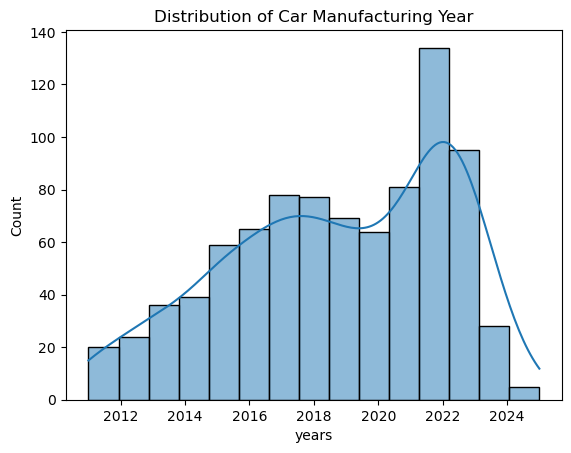

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['years'], bins=15, kde=True)
plt.title('Distribution of Car Manufacturing Year')
plt.show()

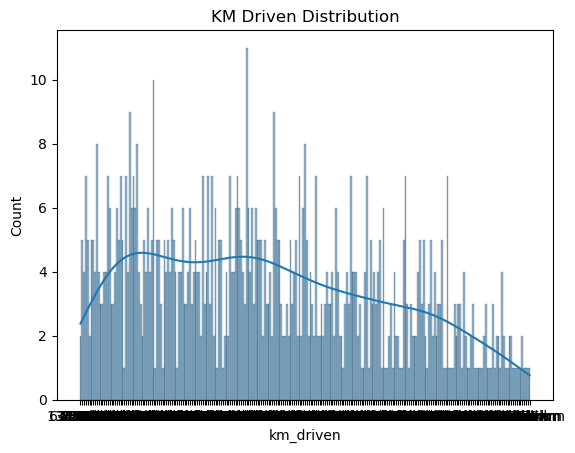

In [527]:
sns.histplot(df['km_driven'], bins=20, kde=True)
plt.title('KM Driven Distribution')
plt.show()

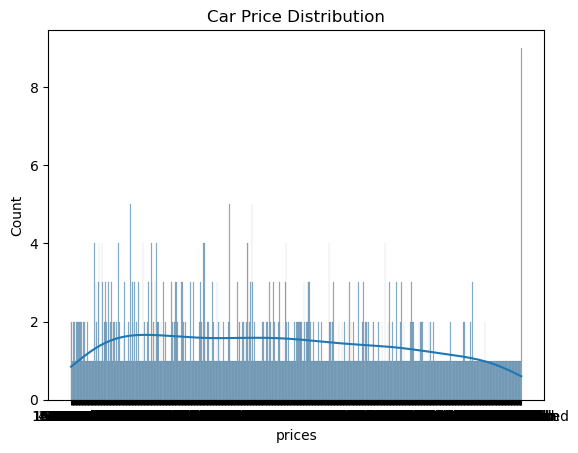

In [529]:
sns.histplot(df['prices'], bins=20, kde=True)
plt.title('Car Price Distribution')
plt.show()

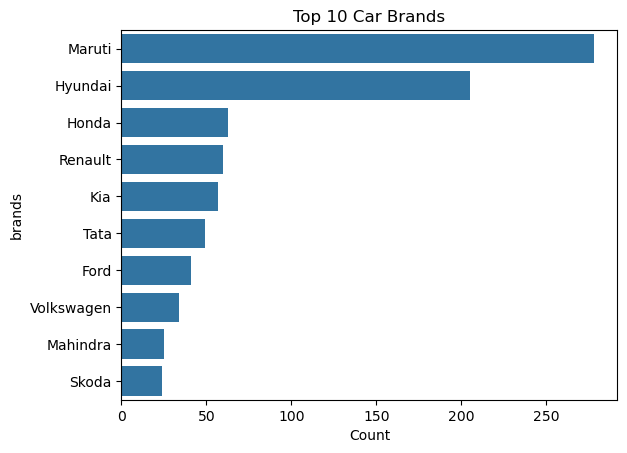

In [530]:
top_brands = df['brands'].value_counts().head(10)

sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Car Brands')
plt.xlabel('Count')
plt.show()


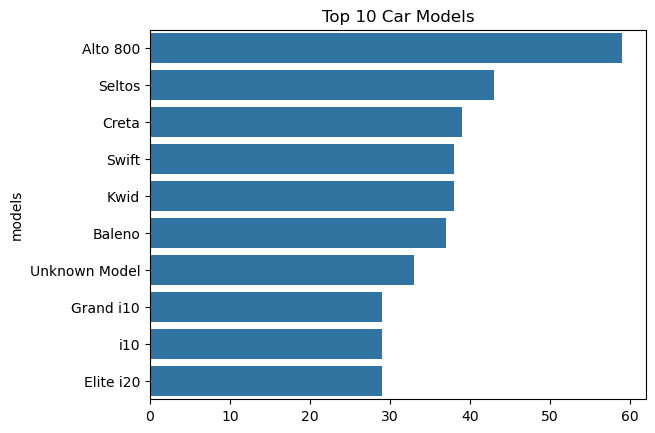

In [531]:
top_models = df['models'].value_counts().head(10)

sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top 10 Car Models')
plt.show()


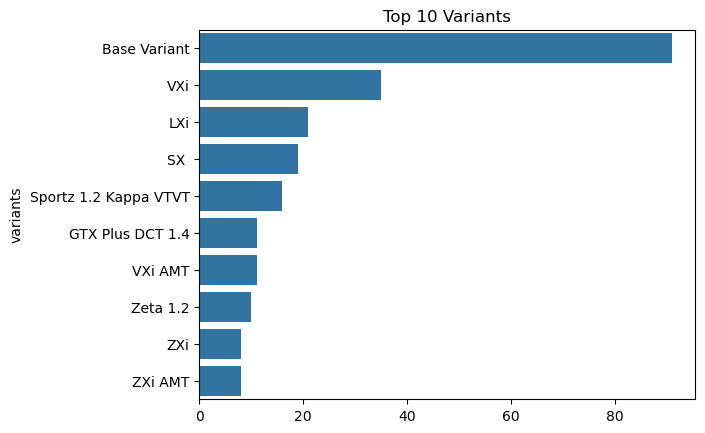

In [532]:
top_variants = df['variants'].value_counts().head(10)

sns.barplot(x=top_variants.values, y=top_variants.index)
plt.title('Top 10 Variants')
plt.show()


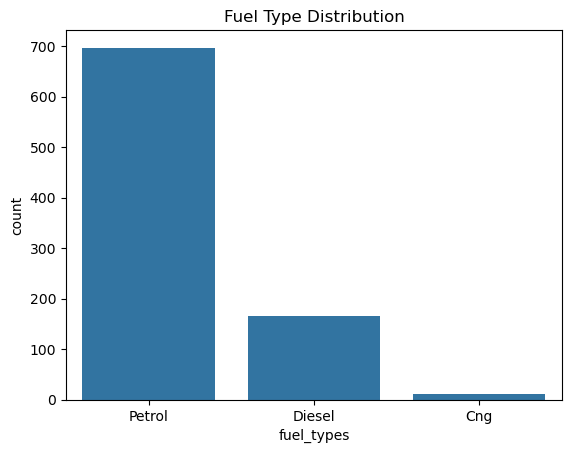

In [533]:
sns.countplot(x=df['fuel_types'])
plt.title('Fuel Type Distribution')
plt.show()


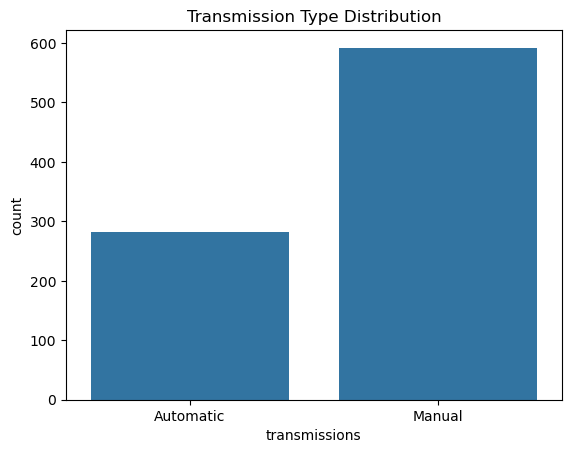

In [534]:
sns.countplot(x=df['transmissions'])
plt.title('Transmission Type Distribution')
plt.show()


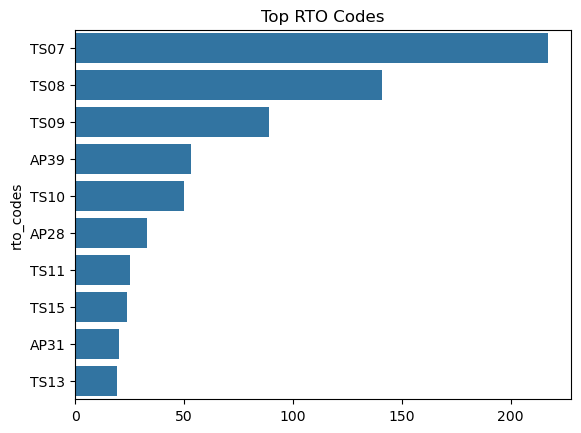

In [535]:
top_rto = df['rto_codes'].value_counts().head(10)

sns.barplot(x=top_rto.values, y=top_rto.index)
plt.title('Top RTO Codes')
plt.show()


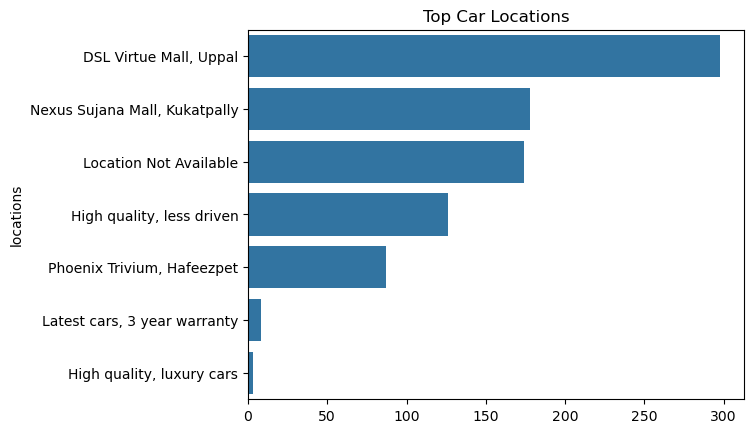

In [536]:
top_locations = df['locations'].value_counts().head(10)

sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top Car Locations')
plt.show()


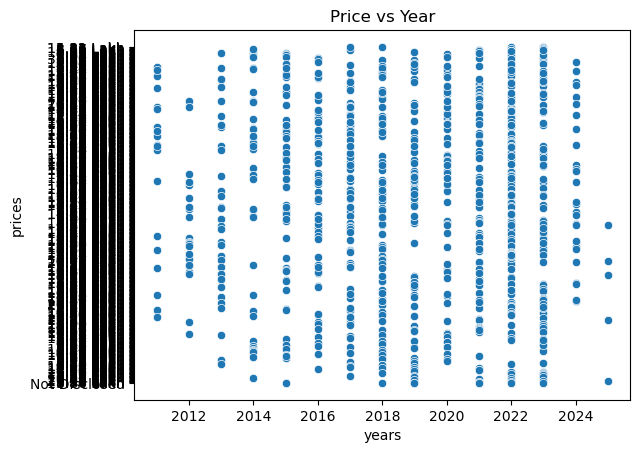

In [543]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='years', y='prices', data=df)
plt.title('Price vs Year')
plt.show()

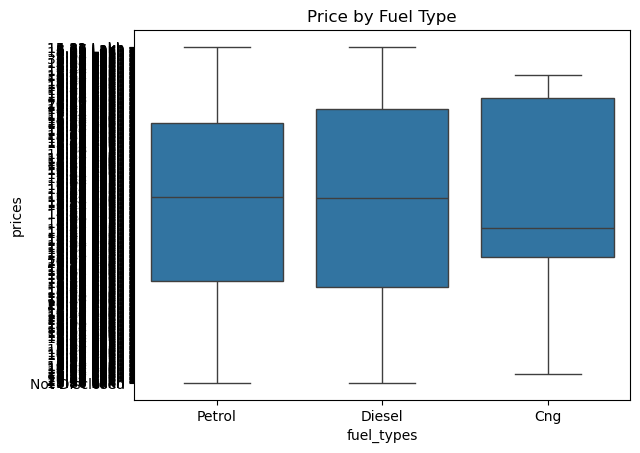

In [545]:
sns.boxplot(x='fuel_types', y='prices', data=df)
plt.title('Price by Fuel Type')
plt.show()

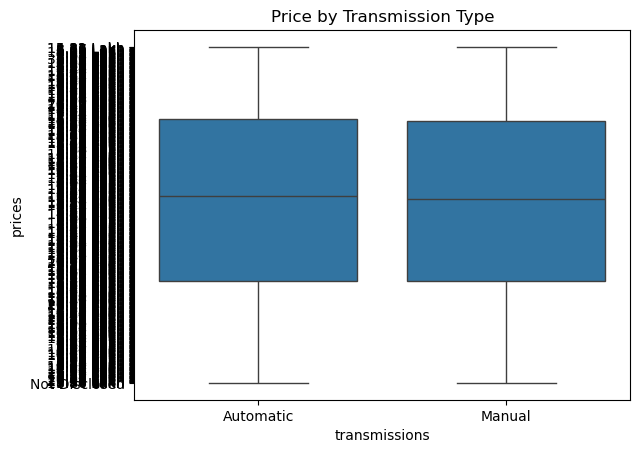

In [546]:
sns.boxplot(x='transmissions', y='prices', data=df)
plt.title('Price by Transmission Type')
plt.show()


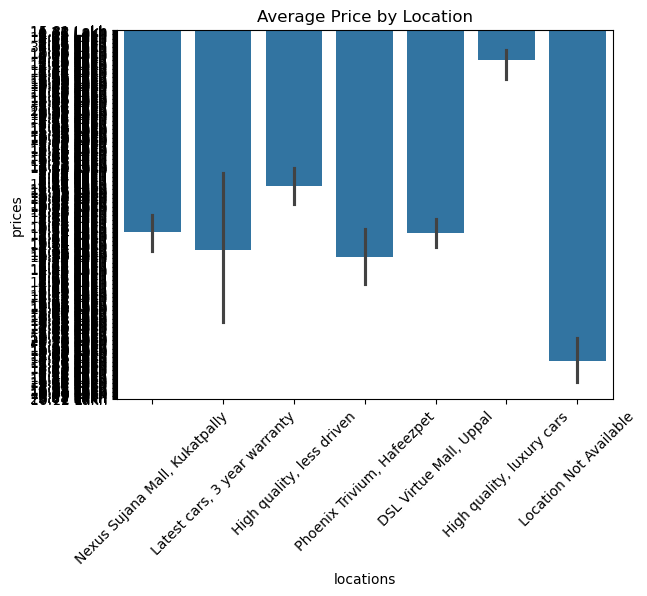

In [548]:
top_locations = df['locations'].value_counts().head(8).index
loc_df = df[df['locations'].isin(top_locations)]

sns.barplot(x='locations', y='prices', data=loc_df, estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Price by Location')
plt.show()

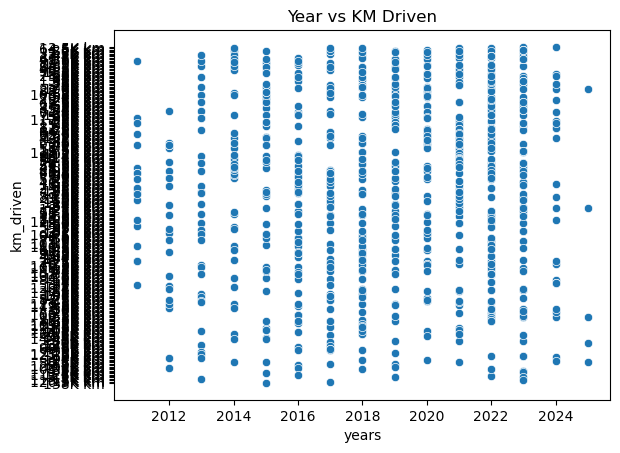

In [549]:
sns.scatterplot(x='years', y='km_driven', data=df)
plt.title('Year vs KM Driven')
plt.show()


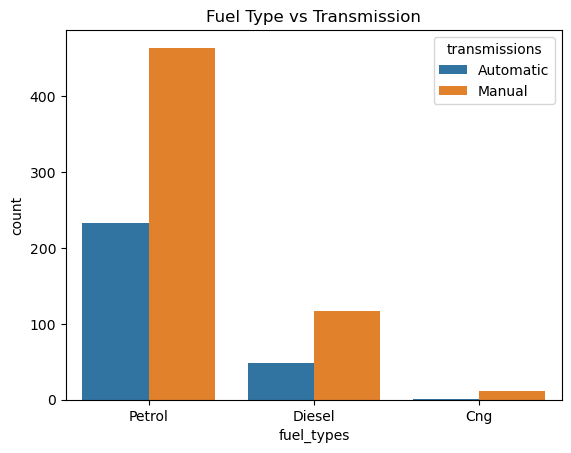

In [550]:
sns.countplot(x='fuel_types', hue='transmissions', data=df)
plt.title('Fuel Type vs Transmission')
plt.show()